In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv', encoding='unicode escape')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.shape

(5110, 12)

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df.shape

(4909, 12)

In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# EDA

### ID

In [11]:
df.drop(['id'], axis=1, inplace=True)

### Gender

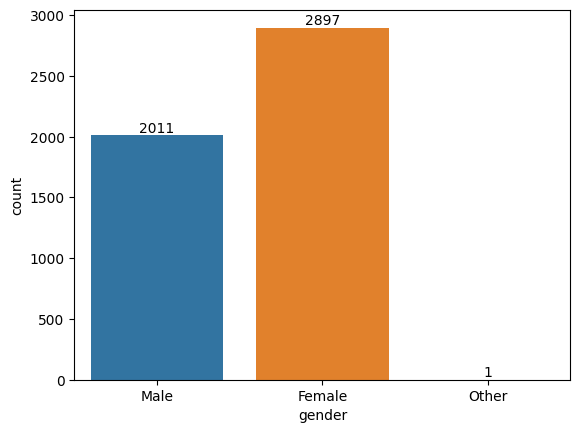

In [12]:
ax = sns.countplot(data = df, x = 'gender', hue = 'gender')

for bars in ax.containers:
    ax.bar_label(bars)

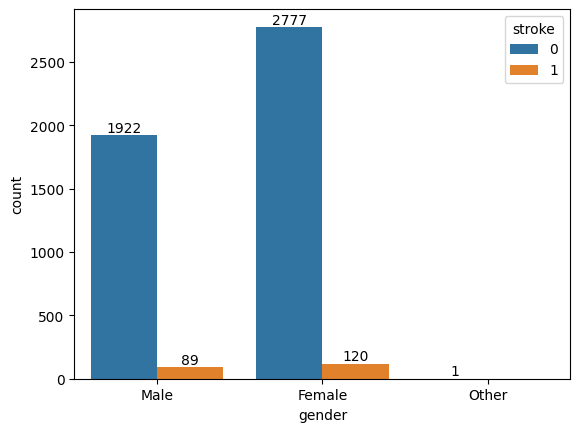

In [13]:
ax = sns.countplot(data = df, x = 'gender', hue = 'stroke')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='gender', ylabel='stroke'>

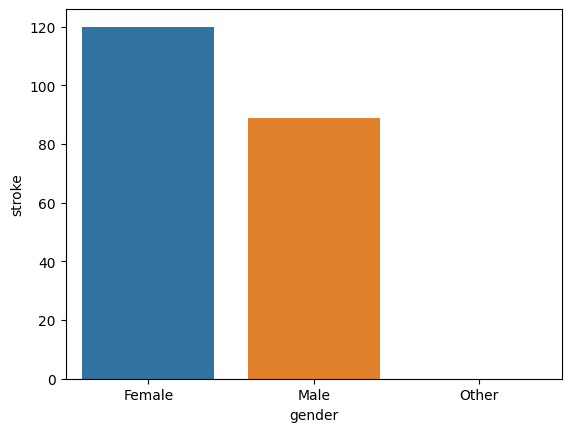

In [14]:
stroke_gen = df.groupby(['gender'], as_index=False)['stroke'].sum().sort_values(by='stroke', ascending=False)

sns.barplot(data=stroke_gen, x='gender', y='stroke', hue='gender')

### Age

In [15]:
df['age'].nunique()

104

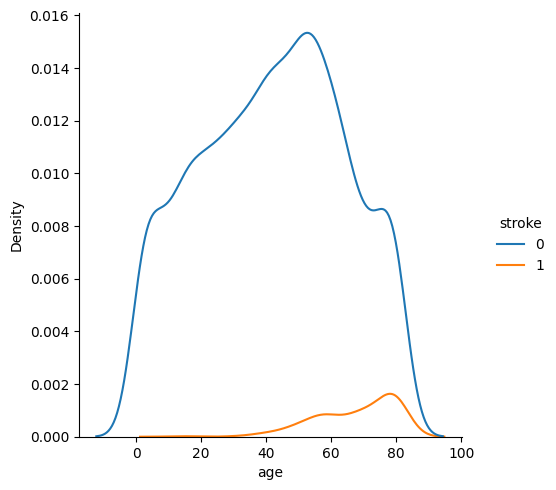

In [16]:
sns.displot(data=df, x='age', hue='stroke', kind='kde')

<Axes: xlabel='stroke', ylabel='age'>

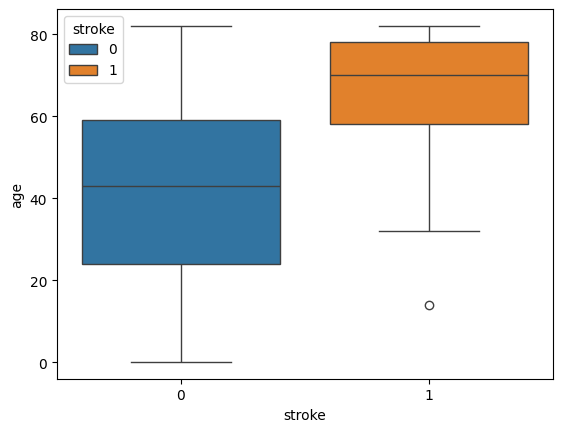

In [17]:
sns.boxplot(data=df, x='stroke', y='age', hue='stroke')

### Hypertension

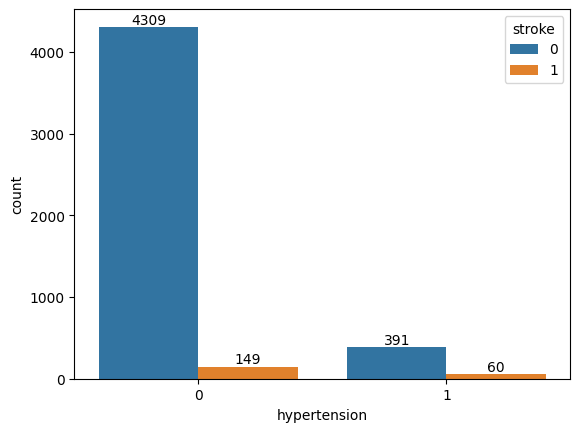

In [18]:
ax = sns.countplot(data=df, x='hypertension', hue='stroke')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='hypertension', ylabel='stroke'>

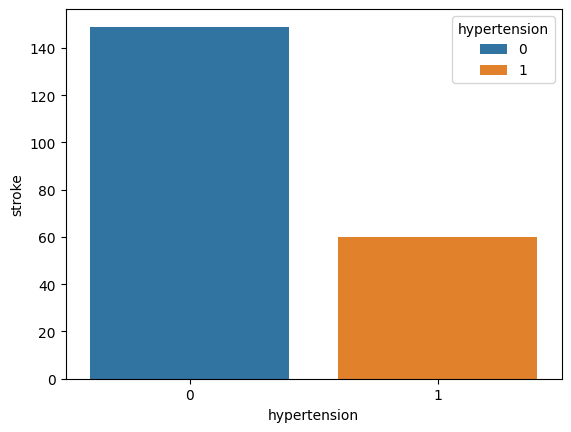

In [19]:
stroke_hyper = df.groupby(['hypertension'], as_index=False)['stroke'].sum().sort_values(by='stroke', ascending=False)
sns.barplot(data=stroke_hyper, x='hypertension', y='stroke', hue='hypertension')

### Heart Disease

In [20]:
df['heart_disease'].value_counts()

heart_disease
0    4666
1     243
Name: count, dtype: int64

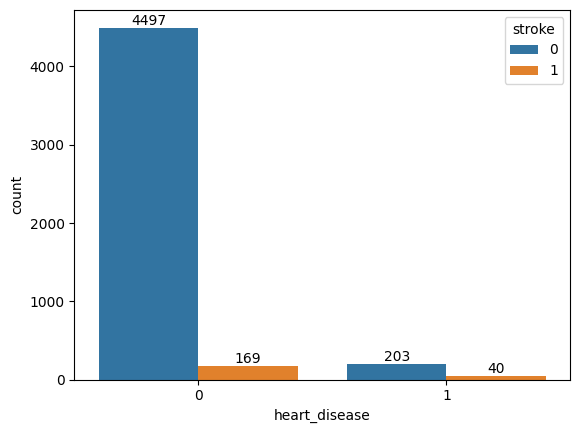

In [21]:
ax = sns.countplot(data=df, x='heart_disease', hue='stroke')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='heart_disease', ylabel='stroke'>

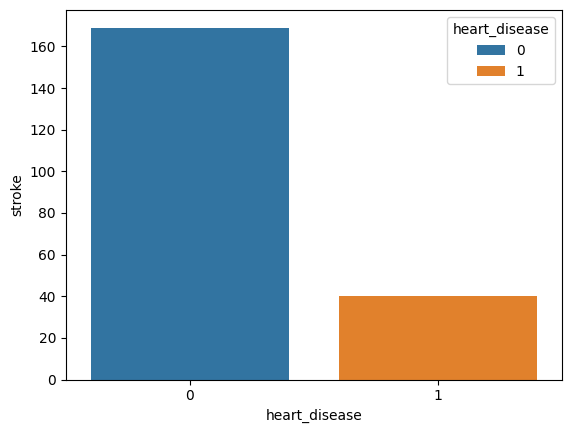

In [22]:
stroke_heart = df.groupby(['heart_disease'], as_index=False)['stroke'].sum().sort_values(by='stroke', ascending=False)
sns.barplot(data=stroke_heart, x='heart_disease', y='stroke', hue='heart_disease')

### Ever Married

In [23]:
df['ever_married'].value_counts()

ever_married
Yes    3204
No     1705
Name: count, dtype: int64

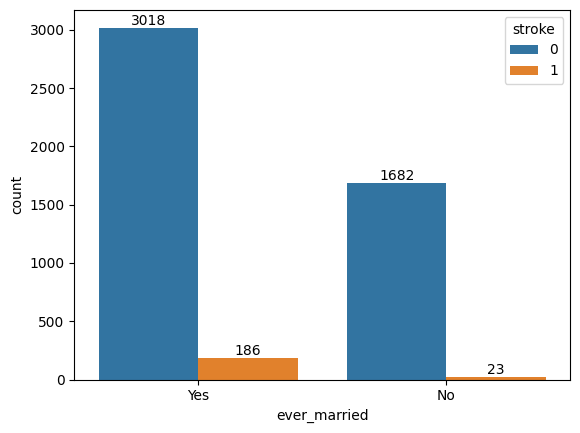

In [24]:
ax = sns.countplot(data=df, x='ever_married', hue='stroke')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='ever_married', ylabel='stroke'>

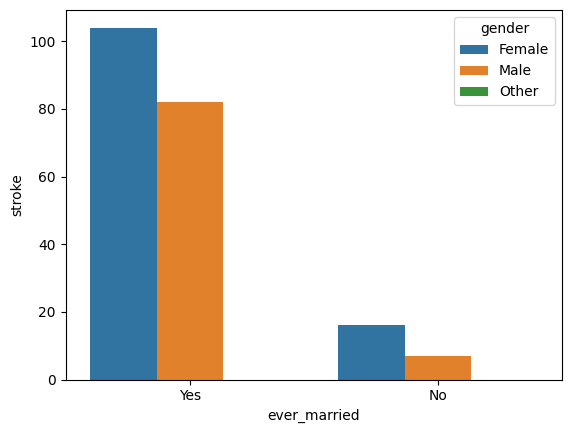

In [25]:
stroke_marry = df.groupby(['ever_married', 'gender'], as_index=False)['stroke'].sum().sort_values(by='stroke', ascending=False)

sns.barplot(data=stroke_marry, x='ever_married', y='stroke', hue='gender')

### Work Type

In [26]:
df['work_type'].value_counts()

work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

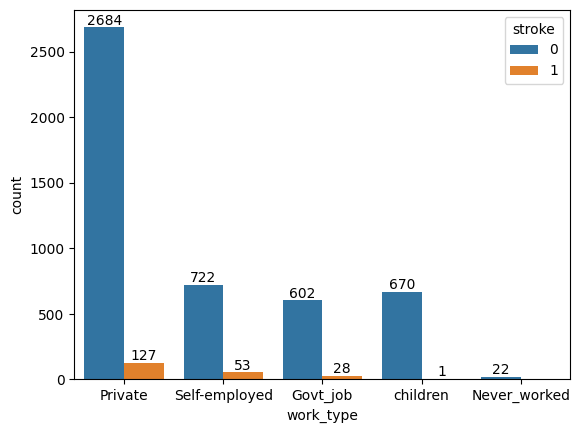

In [27]:
ax = sns.countplot(data=df, x='work_type', hue='stroke')

for bars in ax.containers:
    ax.bar_label(bars)

In [28]:
df['stroke'].value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

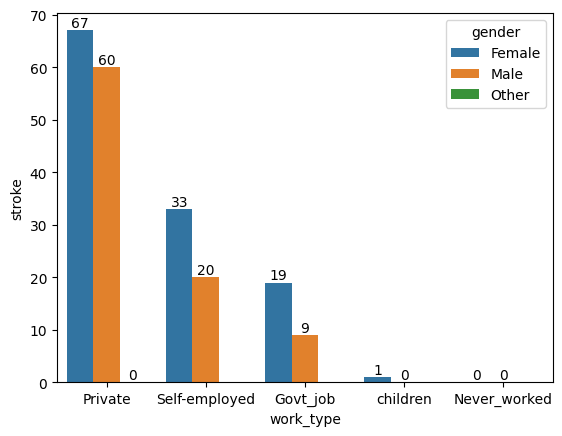

In [29]:
stroke_work = df.groupby(['work_type','gender'], as_index=False)['stroke'].sum().sort_values(by='stroke', ascending=False)
ax = sns.barplot(data=stroke_work, x='work_type', y='stroke', hue='gender')

for  bars in ax.containers:
    ax.bar_label(bars)

### Residence Type

In [30]:
df['Residence_type'].value_counts()

Residence_type
Urban    2490
Rural    2419
Name: count, dtype: int64

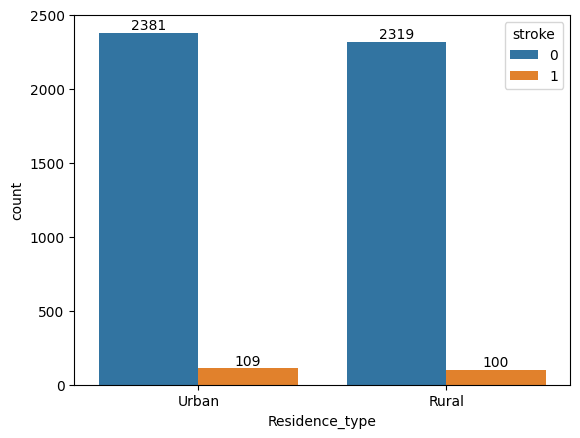

In [31]:
ax = sns.countplot(data=df, x='Residence_type', hue='stroke')

for bars in ax.containers:
    ax.bar_label(bars)

### Average Glucose Level

In [32]:
df['avg_glucose_level'].value_counts()

avg_glucose_level
93.88     6
73.00     5
83.16     5
91.85     5
72.49     5
         ..
58.57     1
70.09     1
186.21    1
174.12    1
171.23    1
Name: count, Length: 3852, dtype: int64

In [33]:
df['avg_glucose_level'].nunique()

3852

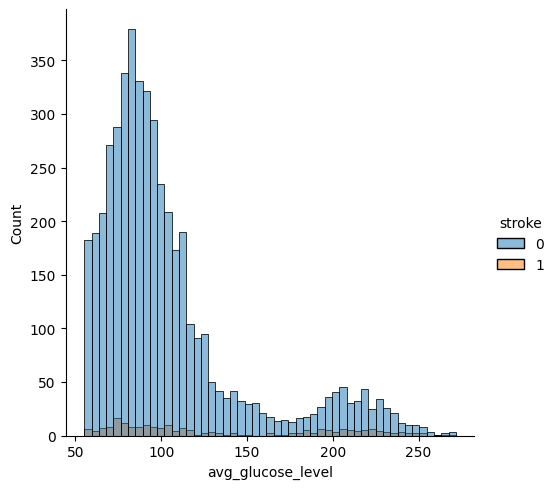

In [34]:
sns.displot(data=df, x='avg_glucose_level', hue='stroke')

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

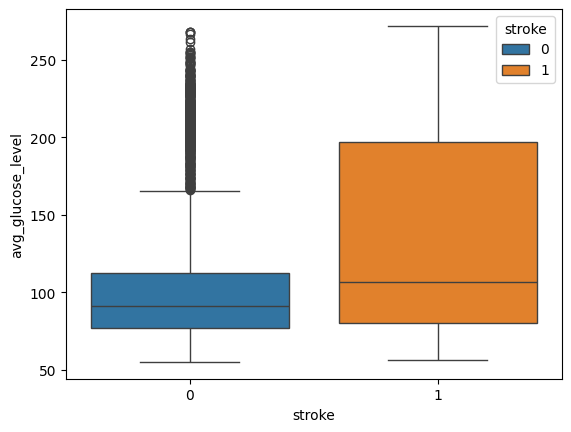

In [35]:
sns.boxplot(data=df, x='stroke', y='avg_glucose_level', hue='stroke')

### BMI

In [36]:
df['bmi'].nunique()

418

In [37]:
df['bmi'].value_counts()

bmi
28.7    41
28.4    38
27.7    37
27.6    37
26.7    37
        ..
47.9     1
13.0     1
13.9     1
54.1     1
14.9     1
Name: count, Length: 418, dtype: int64

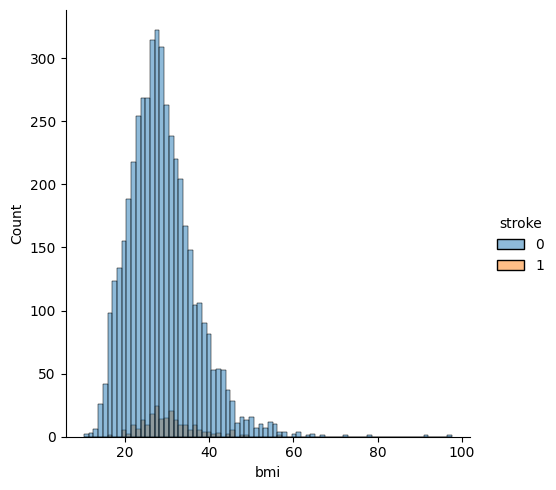

In [38]:
sns.displot(data=df, x='bmi', hue='stroke')

<Axes: xlabel='stroke', ylabel='bmi'>

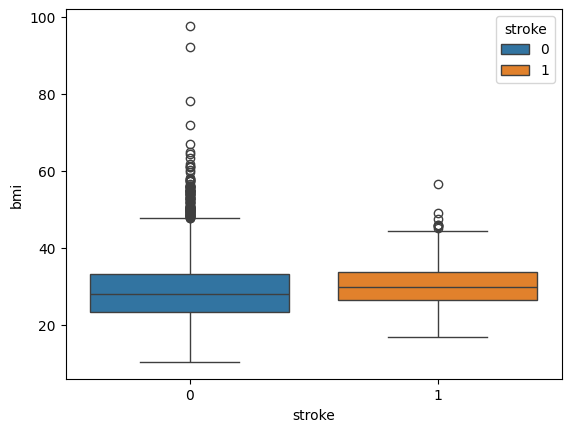

In [39]:
sns.boxplot(data=df, x='stroke', y='bmi', hue='stroke')

In [40]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Smoking Status

In [41]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64

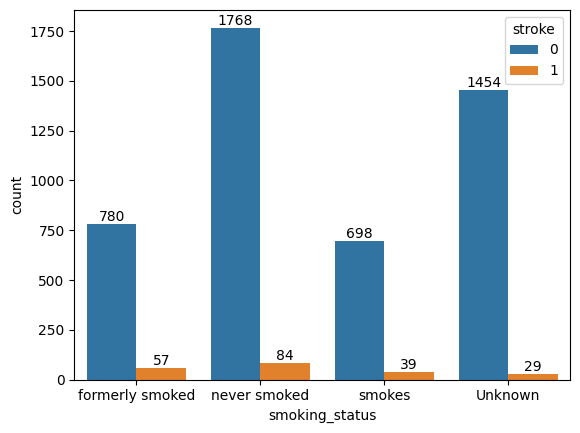

In [42]:
ax = sns.countplot(data=df, x='smoking_status', hue='stroke')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='smoking_status', ylabel='stroke'>

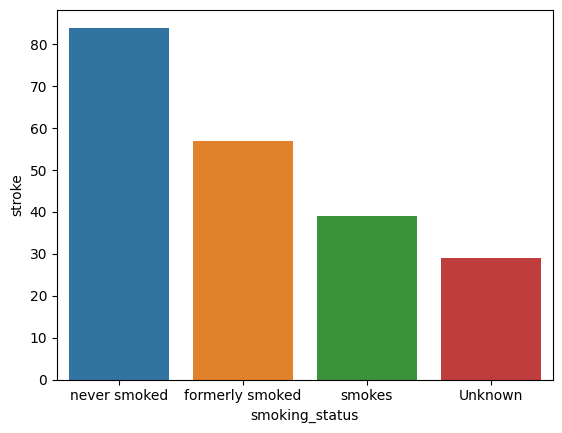

In [43]:
stroke_smoke = df.groupby(['smoking_status'], as_index=False)['stroke'].sum().sort_values(by='stroke', ascending=False)

sns.barplot(data=stroke_smoke, x='smoking_status', y='stroke', hue='smoking_status')

### Stroke

In [44]:
df['stroke'].value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

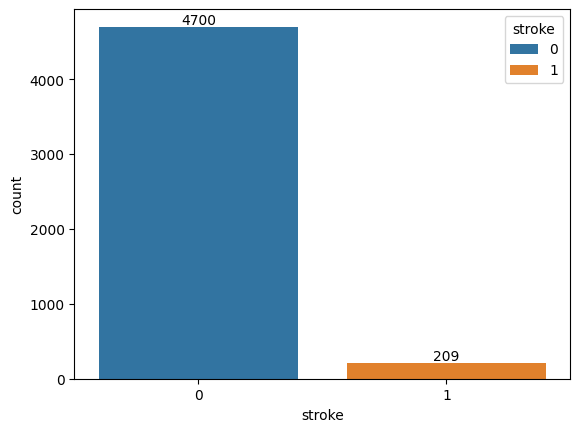

In [45]:
ax = sns.countplot(data=df, x='stroke', hue='stroke')

for bars in ax.containers:
    ax.bar_label(bars)

# Feature Engineering

## Label Encoding

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [47]:
cols = df.select_dtypes(include=['object']).columns
cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[cols] = df[cols].apply(le.fit_transform)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.2 KB


In [50]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.030738,0.021578,0.082712,-0.037237,0.058560,-0.005014,0.053664,-0.026678,-0.060004,0.006757
age,-0.030738,1.000000,0.274425,0.257123,0.680782,-0.366987,0.010948,0.235838,0.333398,0.275515,0.232331
hypertension,0.021578,0.274425,1.000000,0.115991,0.162406,-0.052750,-0.001074,0.180543,0.167811,0.110808,0.142515
heart_disease,0.082712,0.257123,0.115991,1.000000,0.111245,-0.030373,-0.002362,0.154525,0.041357,0.055236,0.137938
ever_married,-0.037237,0.680782,0.162406,0.111245,1.000000,-0.357946,0.004989,0.151377,0.341695,0.264642,0.105089
work_type,0.058560,-0.366987,-0.052750,-0.030373,-0.357946,1.000000,-0.005422,-0.050581,-0.304876,-0.310911,-0.033756
Residence_type,-0.005014,0.010948,-0.001074,-0.002362,0.004989,-0.005422,1.000000,-0.007617,-0.000122,0.013810,0.006031
avg_glucose_level,0.053664,0.235838,0.180543,0.154525,0.151377,-0.050581,-0.007617,1.000000,0.175502,0.066335,0.138936
bmi,-0.026678,0.333398,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,0.224473,0.042374
smoking_status,-0.060004,0.275515,0.110808,0.055236,0.264642,-0.310911,0.013810,0.066335,0.224473,1.000000,0.051558


<Axes: >

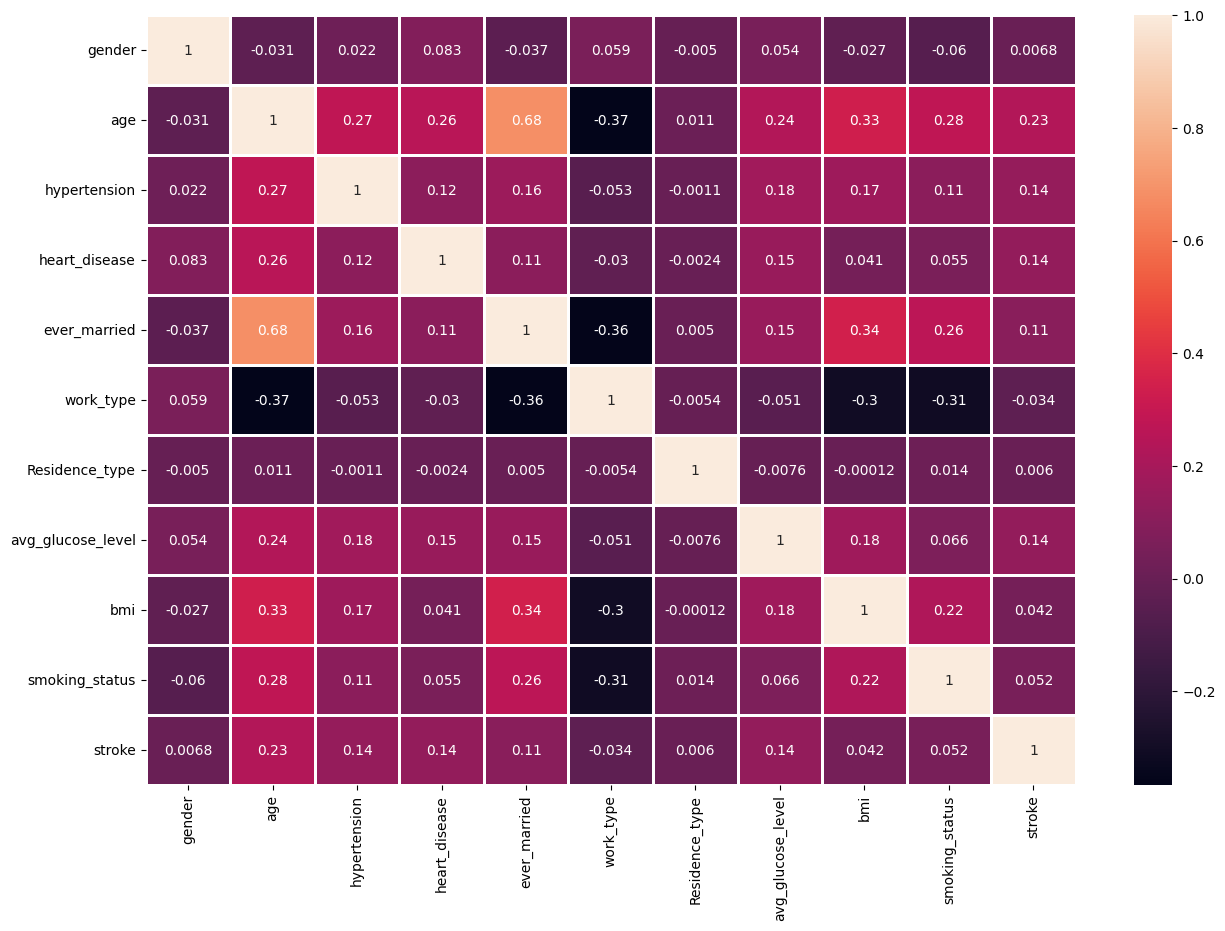

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), annot=True, linewidth=1)

In [52]:
df1 = df.drop('stroke', axis=1)
df1.shape

(4909, 10)

In [53]:
df1.corrwith(df['stroke'])

gender               0.006757
age                  0.232331
hypertension         0.142515
heart_disease        0.137938
ever_married         0.105089
work_type           -0.033756
Residence_type       0.006031
avg_glucose_level    0.138936
bmi                  0.042374
smoking_status       0.051558
dtype: float64

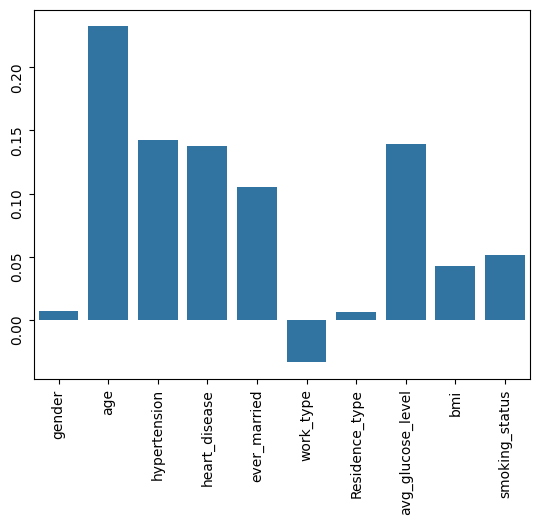

In [54]:
ax = sns.barplot(data=df1.corrwith(df['stroke']))
ax.tick_params(labelrotation=90)

#### *Variables that are showing some effective correlation are : age, hypertension, heart_disease, ever_married, avg_glucose_level.*

## Splitting Data

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[cols], df['stroke'], random_state=1255, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3681, 5), (1228, 5), (3681,), (1228,))

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
smote=SMOTE()
X_train, y_train=smote.fit_resample(X_train, y_train)
X_test, y_test=smote.fit_resample(X_test, y_test)

In [58]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Accuracy score of LogisticRegression : ', accuracy_score(y_test, y_pred_lr))
print('f1-score of LogisticRegression : ', f1_score(y_test, y_pred_lr))

Accuracy score of LogisticRegression :  0.6025531914893617
f1-score of LogisticRegression :  0.6846725185685347


In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, random_state=5, n_jobs=-1)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print('Accuracy score of RandomForestClassifier : ', accuracy_score(y_test, y_pred_rfc))
print('f1-score of RandomForestClassifier : ', f1_score(y_test, y_pred_rfc))

Accuracy score of RandomForestClassifier :  0.5782978723404255
f1-score of RandomForestClassifier :  0.6145468689225982


In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic', n_estimators=100000, max_depth=5, learning_rate=0.001, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print('Accuracy score of XGBClassifier : ', accuracy_score(y_test, y_pred_xgb))
print('f1-score of XGBClassifier : ', f1_score(y_test, y_pred_xgb))

Accuracy score of XGBClassifier :  0.5804255319148937
f1-score of XGBClassifier :  0.6157443491816056


<Axes: >

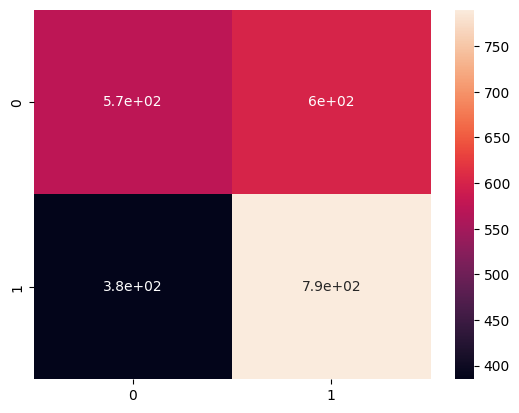

In [62]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(data=cm, annot=True)

In [63]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.60      0.49      0.54      1175
           1       0.57      0.67      0.62      1175

    accuracy                           0.58      2350
   macro avg       0.58      0.58      0.58      2350
weighted avg       0.58      0.58      0.58      2350

